<a href="https://colab.research.google.com/github/itsmahadi007/AI/blob/master/Thesis_image_processing_Original_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre-processing

In [ ]:
%tensorflow_version 2.x
import tensorflow
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
'getting access to drive'
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
'Extracting data'
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/Datasets/DataSetNew.zip'


In [ ]:
from PIL import Image
from pathlib import Path
'Variables for train data'
trainData = []
train_y = []

'Variables for test data'
testData = []
test_y = []

'For lebel taking there name'
vehicles = ['bus', 'car', 'cng', 'truck', 'rickshaw']

'Getting all the data from the data set'
for target, vehicle in enumerate(vehicles):
    for path in Path('/content/DataSetNew/Classification/Side/Train/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60))) #geting all the image from that dir and converting them into 60 / 60 image . i reshape it after seeing the minimum size from the image below.
        train_y.append(target)
        trainData.append(image)

    for path in Path('/content/DataSetNew/Classification/Side/Test/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        test_y.append(target)
        testData.append(image)

    for path in Path('/content/DataSetNew/Classification/Top/Train/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        train_y.append(target)
        trainData.append(image)

    for path in Path('/content/DataSetNew/Classification/Top/Test/%s' %(vehicle)).rglob('*.jpg'):
        image = np.array(Image.open(path).resize((60, 60)))
        test_y.append(target)
        testData.append(image)

'Converting array into numpy array because transorflow only aceept numpy array and tensor file'
trainData = np.array(trainData)
testData = np.array(testData)
train_y = np.array(train_y)
test_y = np.array(test_y)

print('Number of train data', len(trainData))
print('Number of test data', len(testData))

Number of train data 3301
Number of test data 673


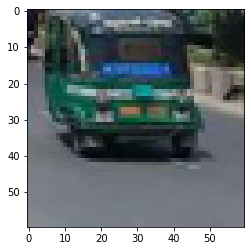

In [ ]:
plt.imshow(trainData[1500])

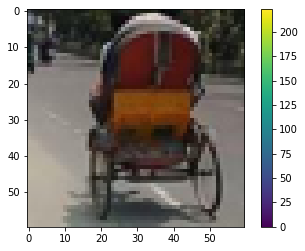

In [ ]:
'Vewing any image as i choose to see'


plt.imshow(testData[600])
plt.colorbar()

In [ ]:
'Checking the minimum image size'
minr, minc = np.inf, np.inf

for img in trainData:
    minr = min(minr, img.shape[0])
    minc = min(minc, img.shape[1])

print(minr, minc)

60 60


In [ ]:
print(trainData[110].shape)

(60, 60, 3)


Building Keras Model

![alt text](https://www.researchgate.net/profile/Maher_Al-Zuhairi/publication/325115367/figure/fig1/AS:631428412878849@1527555673821/The-typical-CNN-model-architecture.png)

We will use famous image classification architectures given in the [link](https://keras.io/applications/)



In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

def model1():
    'Creating a Sequential model'
    model = Sequential()

    'Adding MobileNet V1 layers'
    model.add(MobileNet(input_shape=(60, 60, 3), include_top=False))

    'Flat the image'
    model.add(Flatten())

    'Adding Dense layer'
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))

    'Adding SoftMax layer'
    model.add(Dense(5, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['acc'])

    return model

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

One Hot Encoding

![alt text](https://miro.medium.com/max/2736/0*T5jaa2othYfXZX9W.)

In [ ]:
print('Before one-hot-encoding')
print(train_y[620:630], end='\n\n')

print('After one-hot-encoding')
print(y_train[620:630])

Before one-hot-encoding
[0 0 0 0 1 1 1 1 1 1]

After one-hot-encoding
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [ ]:
model = model1()

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(trainData, y_train, epochs=20, batch_size = 128,
                    validation_data=(testData, y_test))

Epoch 1/20
26/26 [==============================] - 27s 144ms/step - loss: 0.3793 - acc: 0.8728 - val_loss: 4.9866 - val_acc: 0.1456
Epoch 2/20
26/26 [==============================] - 2s 59ms/step - loss: 0.0222 - acc: 0.9949 - val_loss: 2.1311 - val_acc: 0.4101
Epoch 3/20
26/26 [==============================] - 1s 57ms/step - loss: 0.0091 - acc: 0.9973 - val_loss: 2.4103 - val_acc: 0.3447
Epoch 4/20
26/26 [==============================] - 1s 57ms/step - loss: 0.0103 - acc: 0.9964 - val_loss: 1.7708 - val_acc: 0.3551
Epoch 5/20
26/26 [==============================] - 2s 60ms/step - loss: 0.0093 - acc: 0.9973 - val_loss: 0.7409 - val_acc: 0.5988
Epoch 6/20
26/26 [==============================] - 1s 57ms/step - loss: 0.0084 - acc: 0.9982 - val_loss: 0.7895 - val_acc: 0.6211
Epoch 7/20
26/26 [==============================] - 1s 56ms/step - loss: 0.0171 - acc: 0.9952 - val_loss: 0.2523 - val_acc: 0.9153
Epoch 8/20
26/26 [==============================] - 1s 58ms/step - loss: 0.0133 -

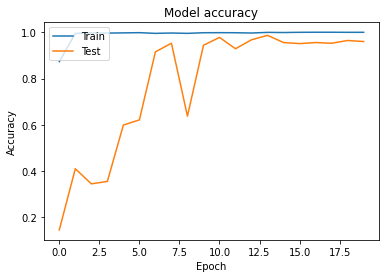

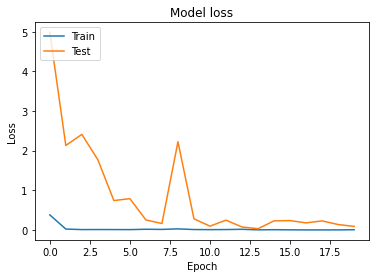

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save('savedModel_12.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('savedModel_12.h5')

In [ ]:
outs = loaded_model.predict(testData[600:601]).argmax(axis=1)

1/1 [==============================] - 0s 425ms/step


In [ ]:
print(vehicles[outs[0]])

rickshaw


In [ ]:
loaded_model.evaluate(testData, y_test)

22/22 [==============================] - 1s 7ms/step - loss: 0.0883 - acc: 0.9599


[0.08829882740974426, 0.9598811268806458]